<a href="https://colab.research.google.com/github/firman-hoerulloh/Python_WordcloudVisualization/blob/main/Visualisasi_Wordcloud_Quranic_English_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firman Hoerulloh | 1301213392

# Visualisasi Wordcloud

Dataset yang digunakan merupakan dataset Al-Qur'an Terjemahan Bahasa Inggris.

Link dataset: https://dataverse.telkomuniversity.ac.id/dataset.xhtml?persistentId=doi:10.34820/FK2/XQCNPN

In [ ]:
#Library
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
!gdown --id 1ZrK46nfSgv2ktjktXzq6EJ8fswqdxe1M

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZrK46nfSgv2ktjktXzq6EJ8fswqdxe1M
To: /content/quran_english_translation.xlsx
100% 495k/495k [00:00<00:00, 74.0MB/s]


In [ ]:
#baca data
df = pd.read_excel("quran_english_translation.xlsx")
df.head()

,Jumlah Ayat,Surah ke-,verse,Terjemahan
0,1,1,1,"In the name of Allah, the Beneficent, the Mer..."
1,2,1,2,"All praise is due to Allah, the Lord of the W..."
2,3,1,3,"The Beneficent, the Merciful."
3,4,1,4,Master of the Day of Judgment.
4,5,1,5,Thee do we serve and Thee do we beseech for h...


In [ ]:
df.tail()

,Jumlah Ayat,Surah ke-,verse,Terjemahan
6231,6345,114,2,"The King of men,"
6232,6346,114,3,"The god of men,"
6233,6347,114,4,From the evil of the whisperings of the slink...
6234,6348,114,5,"Who whispers into the hearts of men,"
6235,6349,114,6,Among Jinns and among men.


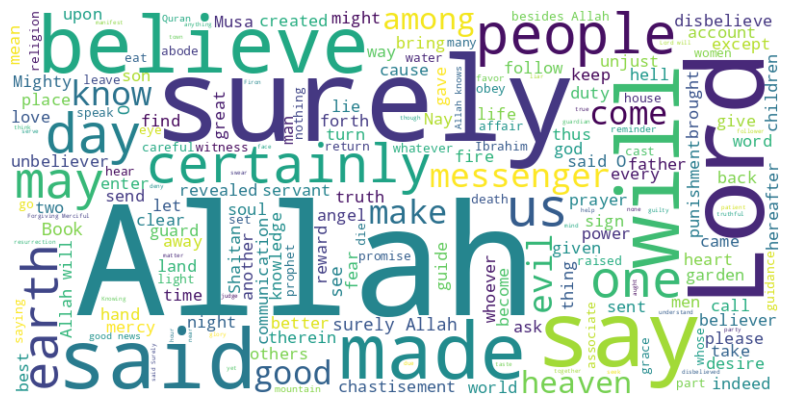

In [ ]:
# Menggabungkan semua teks terjemahan menjadi satu string
text = ' '.join(df['Terjemahan'].astype(str))

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


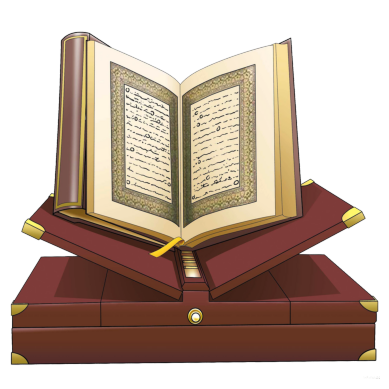

In [ ]:
# URL gambar
image_url = "https://drive.google.com/uc?id=1bcwOmXl0CeNnQYsLlgIOrcpe5anBY8xN"

# Mengunduh gambar dari URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()


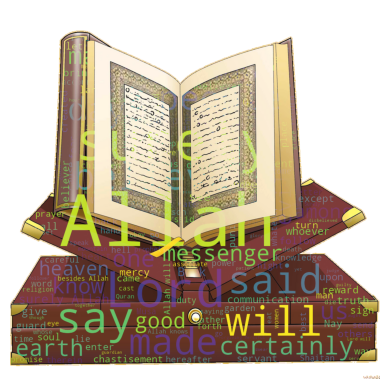

In [ ]:
# inisiasi background_image
background_image = img

# Membuat mask dari gambar latar belakang
mask = np.array(background_image.convert('L'))

# Membuat WordCloud dengan menggunakan mask
wordcloud = WordCloud(max_font_size=200, mask=mask, contour_color='goldenrod', contour_width=2).generate(text)

# Mengonversi WordCloud menjadi array numpy
wordcloud_array = wordcloud.to_array()

# Mengonversi gambar latar belakang ke mode RGB
background_image_rgb = background_image.convert('RGB')

# Menggabungkan WordCloud dengan gambar latar belakang
combined_image_array = np.maximum(np.array(background_image_rgb), wordcloud_array)

# Menampilkan gambar hasil
plt.imshow(combined_image_array)
plt.axis('off')
plt.show()


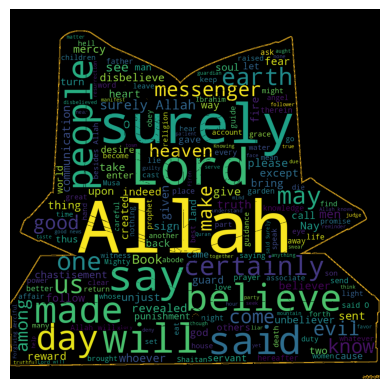

In [ ]:
# Membuat WordCloud dengan menggunakan mask
wordcloud = WordCloud(mask=mask, contour_color='goldenrod', contour_width=1).generate(text)

# Mengonversi WordCloud menjadi array numpy
wordcloud_array = wordcloud.to_array()

# Mengonversi gambar latar belakang ke mode RGB
background_image_rgb = background_image.convert('RGB')

# Menggabungkan WordCloud dengan gambar latar belakang
combined_image_array = np.array(background_image_rgb)

# Mengganti piksel non-putih pada gambar latar belakang dengan hasil WordCloud
for i in range(combined_image_array.shape[0]):
    for j in range(combined_image_array.shape[1]):
        if mask[i, j] > 0:
            combined_image_array[i, j] = wordcloud_array[i, j]

# Menampilkan gambar hasil
plt.imshow(combined_image_array)
plt.axis('off')
plt.show()
